In [94]:
# 引入库
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

In [95]:
# 检查os位置
print(os.getcwd())

/Users/wolves/Downloads/project/python/pt/lab


生成数据方式
$$ x_1 = x, x_2 = x^2, x_3 = \sqrt{x} $$
$$ y = 1.35x_1 + 0.75x_2 + 2.1x_3 + 2.89 $$

In [96]:
# 生成数据
def generate_data():
    w = np.array([1.35, 0.75, 2.1])  # 权重
    b = 2.89  # 偏置
    x_min = 1
    x_max = 9
    x = np.linspace(x_min, x_max, 10) # 均匀分布
    X = np.array([x, x**2, np.sqrt(x)])  # 特征矩阵3x10
    y = np.dot(w, X) + b # 1x10 一维向量不区分行向量和列向量
    y += np.random.normal(scale=0.5, size=y.shape)
    data = np.column_stack((X.T, y)) # 10x4
    return data

# 保存数据
def save_data(filename, data):
    np.savetxt(filename, data, delimiter=',')
    print(f"{filename} 已成功创建并写入数据。")

# 生成并保存数据
data = generate_data()
#save_data('./1_data.txt', data)

In [97]:
# 读取数据
#points = np.genfromtxt("./1_data.txt", delimiter=',')

scaler = StandardScaler()
points = data

m = len(points[:,0])
x = points[:, :3] # 10x3
y = points[:,3] # 1x10

原函数：
$$
\vec{w} = {\begin{bmatrix} w_1 & w_2 & w_3 & \cdots & w_n \end{bmatrix}}^T
$$

$$
\vec{x} = \begin{bmatrix} x_1 & x_2 & x_3 & \cdots & x_n \end{bmatrix}
$$

$$
f_{\vec{w} \cdot,b}(\vec{x}) = \vec{w} \cdot \vec{x} + b
$$

损失函数: 

$$
\text{MSE} = \frac{1}{2m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$$

梯度下降：

分别对每个w和b求偏导数，然后更新w和b
 

In [98]:


# 定义损失函数
def compute_loss(w, b):
    return np.sum((y - (np.dot(w, x.T) + b)) ** 2) / (2 * m)   # w 1x3 x.T 3x10 y 1x10 y-np.dot(w, x.T) 1x10 sum=number

# 定义梯度下降
def gradient_descent(w, b, alpha, num_iter):
    loss_history = []
    for _ in range(num_iter):
        error = y - np.dot(w, x.T) - b # 1x10
        # 计算梯度
        dw = -np.dot(x.T , error) / m  # dw 1x3 
        db = -np.sum(error) / m  # db 1x1
        # 更新w和b
        w -= alpha * dw
        b -= alpha * db
        loss_history.append(compute_loss(w, b))
    return w, b, loss_history

w: [ 6.74308525 18.58329919 -1.16344888]
b: 37.79916995636456
loss: 0.22283060989193695


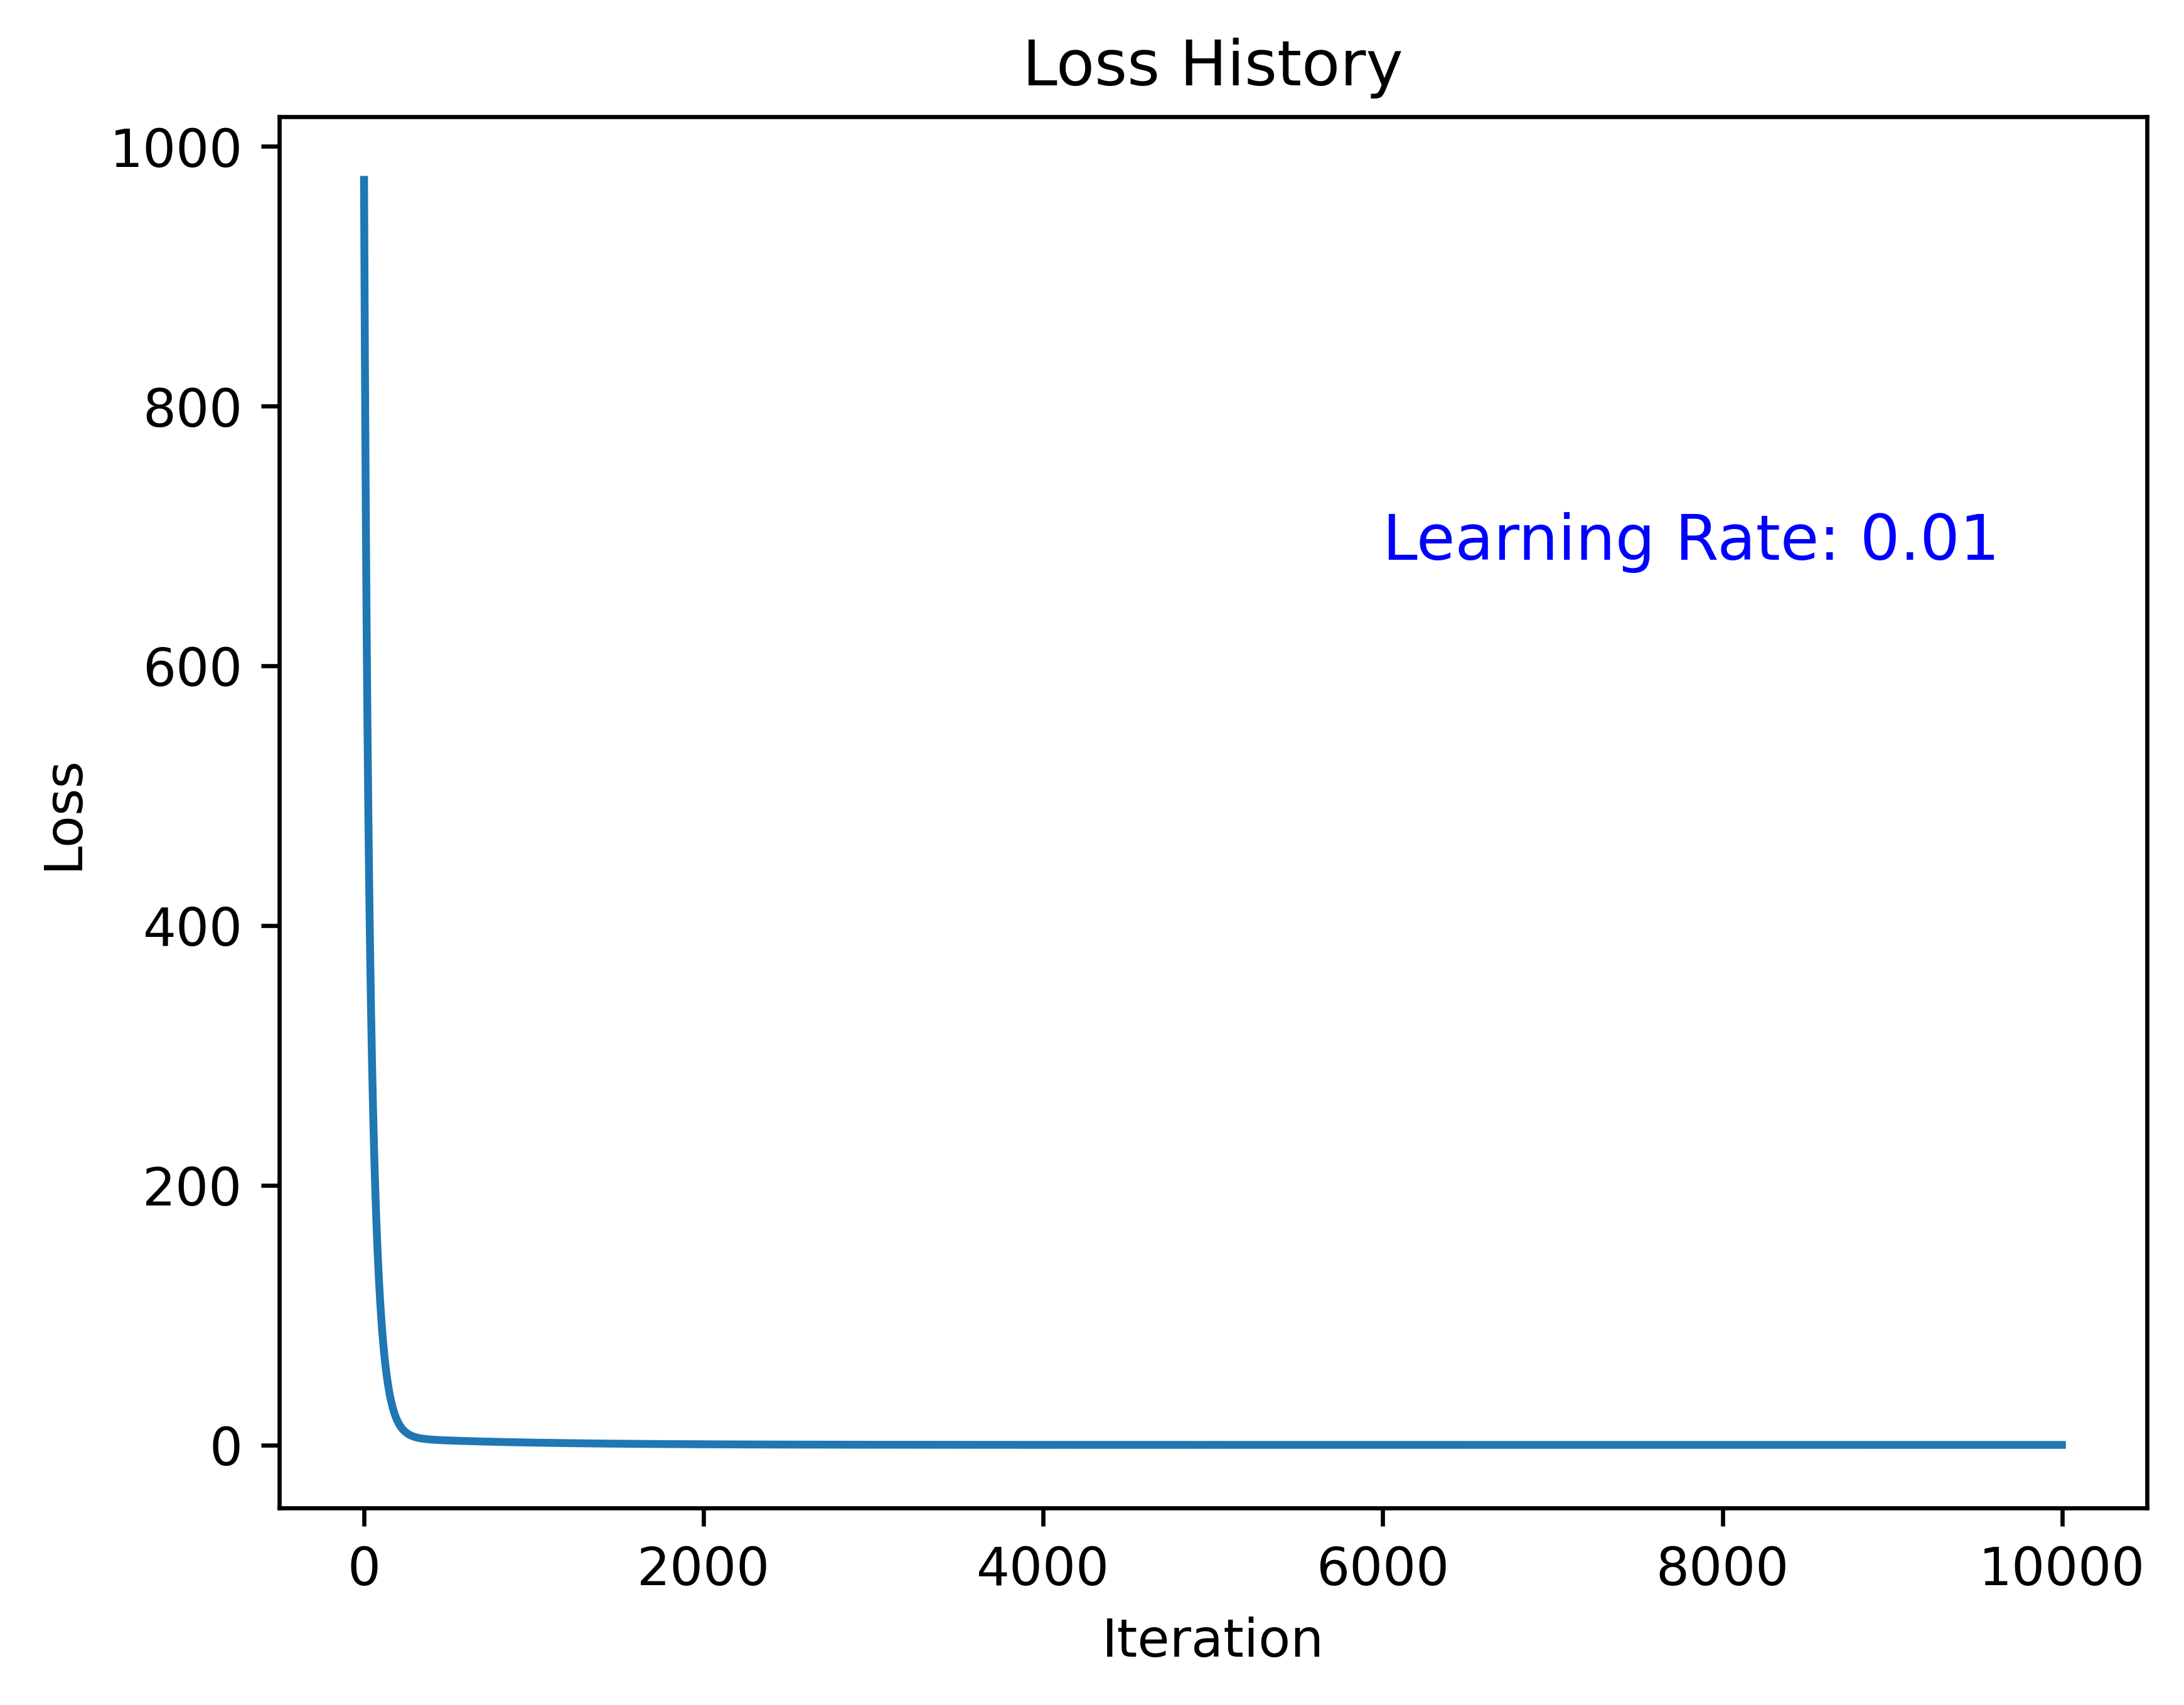

In [99]:
if __name__ == "__main__":
        # 初始化w和b
    w = np.zeros(x.shape[1])
    b = 0.0
    # 设置学习率
    alpha = 0.01
    # 设置迭代次数
    num_iter = 10000
    x = scaler.fit_transform(x) # 特征缩放
    # 进行梯度下降
    w, b, loss_history = gradient_descent(w, b, alpha, num_iter)
    print("w:", w)
    print("b:", b)
    
    # 计算损失
    loss = compute_loss(w, b)
    print("loss:", loss)

    # 绘制
    plt.figure(dpi=600)
    plt.plot(range(num_iter), loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    # 显示学习率
    plt.text(num_iter * 0.6, max(loss_history) * 0.7, f'Learning Rate: {alpha}', fontsize=12, color='blue')

    plt.show()

In [100]:
# 预测
def predict(x, w, b):
    x_scaled = scaler.transform(x)
    y = np.dot(w, x_scaled.T) + b
    return y

def original_predict(x):
    w = np.array([1.35, 0.75, 2.1])
    b = 2.89
    return np.dot(w, x.T) + b

x_new = np.array([
    [2, 4, np.sqrt(2)],
    [3, 9, np.sqrt(3)],
    [4, 16, np.sqrt(4)]
])
y_pred = predict(x_new, w, b)
print("预测值:", y_pred)
y_pred_original = original_predict(x_new)
print("原始值:", y_pred_original)

预测值: [11.70402659 17.3020817  24.41357604]
原始值: [11.55984848 17.3273067  24.49      ]


# 编码中遇到的错误

梯度下降算法中，把x.T和error相乘了，正确应使用矩阵乘法。

在特征缩放前，学习率大之后会overflow，导致模型不收敛。

特征缩放后，由于代码写错，把结果也缩放了，导致后面预测时，结果不正确。

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

model = make_pipeline(LinearRegression())
# 拟合模型
model.fit(x, y)

# 预测
y_pred_sklearn = model.predict(scaler.transform(x_new))
print("使用sklearn预测值:", y_pred_sklearn)
y_pred_original = original_predict(x_new)
print("原始值:", y_pred_original)
# 计算并打印训练数据的损失（MSE）
train_loss = mean_squared_error(y_pred_original, y_pred_sklearn)
print("训练数据的损失 (MSE):", train_loss)


使用sklearn预测值: [11.64087216 17.23308704 24.38469935]
原始值: [11.55984848 17.3273067  24.49      ]
训练数据的损失 (MSE): 0.008843469002214777
